<a href="https://colab.research.google.com/github/hasandafa/submission-machine-learning-dicoding/blob/master/Submission_Machine_Learning_Abdullah_Hasan_Dafa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Machine Learning: Rock Paper Scissors
- Nama: Abdullah Hasan Dafa
- Email: dafa.abdullahhasan@gmail.com
- Id Dicoding: abdullahhasan_dafa

Libraries Prep

In [1]:
!pip install wget

In [2]:
import numpy as np
import wget
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
# from keras.losses import CategoricalCrossentropy
from IPython.display import Image
from google.colab import files

Import Dataset

In [3]:
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
wget.download(url, 'rockpaperscissors.zip')

with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

Image Augmentation

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

Image Split

In [5]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/rockpaperscissors/rps-cv-images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/dataset/rockpaperscissors/rps-cv-images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Model Building

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    AveragePooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    # Conv2D(256, (3,3), activation='relu'),
    # AveragePooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    AveragePooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 111, 111, 32)      0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 54, 54, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 average_pooling2d_2 (Avera  (None, 26, 26, 64)        0

Model Training

In [8]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, mode='max', verbose=1)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=10,
    validation_data=validation_generator,
    validation_steps=10,
    epochs=100,
    verbose=1
    # callbacks=[early_stopping]
)

Epoch 1/100
10/10 [==============================] - 27s 2s/step - loss: 1.1046 - accuracy: 0.3313 - val_loss: 1.0748 - val_accuracy: 0.4219
Epoch 2/100
10/10 [==============================] - 10s 1s/step - loss: 1.0616 - accuracy: 0.4500 - val_loss: 1.0312 - val_accuracy: 0.5406
Epoch 3/100
10/10 [==============================] - 14s 2s/step - loss: 1.0355 - accuracy: 0.5000 - val_loss: 1.0302 - val_accuracy: 0.4500
Epoch 4/100
10/10 [==============================] - 9s 933ms/step - loss: 1.0181 - accuracy: 0.5000 - val_loss: 0.9643 - val_accuracy: 0.6375
Epoch 5/100
10/10 [==============================] - 10s 1s/step - loss: 0.9621 - accuracy: 0.5437 - val_loss: 0.9393 - val_accuracy: 0.5375
Epoch 6/100
10/10 [==============================] - 15s 2s/step - loss: 0.9677 - accuracy: 0.5188 - val_loss: 0.8872 - val_accuracy: 0.7188
Epoch 7/100
10/10 [==============================] - 9s 969ms/step - loss: 0.9493 - accuracy: 0.5750 - val_loss: 0.9523 - val_accuracy: 0.6031
Epoch 8/1

Evaluation

In [9]:
model.evaluate(validation_generator)

28/28 [==============================] - 12s 412ms/step - loss: 0.3487 - accuracy: 0.8753


[0.34874534606933594, 0.8752860426902771]

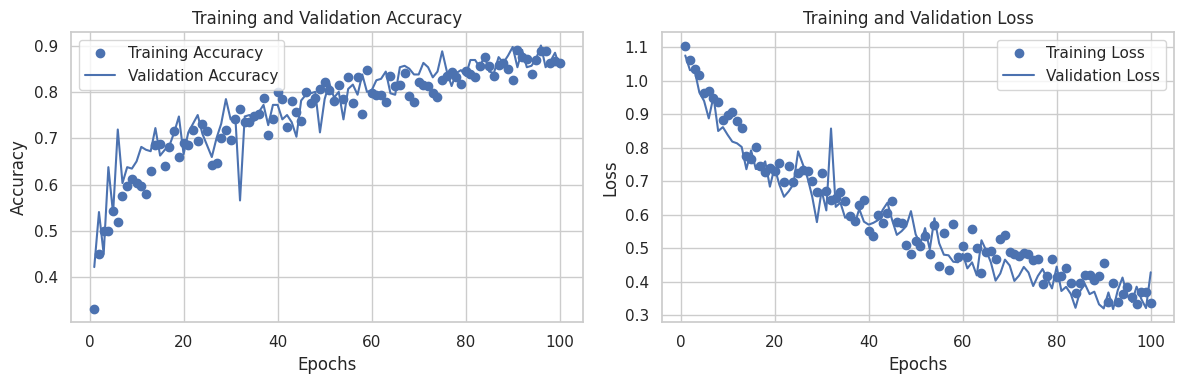

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

sns.set(style='whitegrid')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Predicition

In [11]:
def predict_uploaded_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0

    result = model.predict(img)
    class_index = np.argmax(result)

    return class_index

Saving test gambar 3.jpeg to test gambar 3 (1).jpeg
1/1 [==============================] - 0s 17ms/step
Gambar adalah kertas


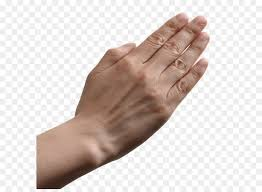

In [16]:
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    class_index = predict_uploaded_image(model, img_path)

    if class_index == 0:
        print("Gambar adalah kertas")
    elif class_index == 1:
        print("Gambar adalah batu")
    else:
        print("Gambar adalah gunting")

    display(Image(img_path))